# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
df = pd.read_csv('/content/RTA_Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [4]:
df.shape

(12316, 32)

In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [7]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7480,19:45:00,Saturday,31-50,Male,Junior high school,Employee,5-10yr,Stationwagen,Owner,Unknown,...,Other,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury


In [8]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

### **Handling Missing Values**

In [11]:
df['Educational_level'] = df['Educational_level'].fillna(df['Educational_level'].mode().iloc[0])
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode().iloc[0])
df['Driving_experience'] = df['Driving_experience'].fillna(df['Driving_experience'].mode().iloc[0])
df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode().iloc[0])
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode().iloc[0])
df['Area_accident_occured'] = df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode().iloc[0])
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode().iloc[0])
df['Road_allignment'] = df['Road_allignment'].fillna(df['Road_allignment'].mode().iloc[0])
df['Types_of_Junction'] = df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode().iloc[0])
df['Road_surface_type'] = df['Road_surface_type'].fillna(df['Road_surface_type'].mode().iloc[0])
df['Type_of_collision'] = df['Type_of_collision'].fillna(df['Type_of_collision'].mode().iloc[0])
df['Vehicle_movement'] = df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode().iloc[0])

In [12]:
df = df.drop(['Service_year_of_vehicle','Work_of_casuality','Fitness_of_casuality'], axis=1)

In [13]:
# Here I wanted to check that if there any types of defects but I found that almost all values are 'No defect', and in my opinion there is no point with fill it with the mode because they will be all 'No defect'
# So I decide to drop it (the column)
print(df['Defect_of_vehicle'].value_counts())

Defect_of_vehicle
No defect    7777
7              76
5              36
Name: count, dtype: int64


In [14]:
df = df.drop(['Defect_of_vehicle'], axis=1)

In [15]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

# **Normalization**

In [17]:
scaler = MinMaxScaler()
df[['Number_of_vehicles_involved', 'Number_of_casualties']] = scaler.fit_transform(df[['Number_of_vehicles_involved', 'Number_of_casualties']])

## **Encoding: one hot and label encoders**

**because the exam is only 4 hours I just applied encoding for the features that I might use it in training the model process**

In [18]:
# Here I removed all 'na' and 'unknown' before encoding because I do not want to treat it as a category
# Just focusing on the main categories of the data
for column in df.columns:
    df[column] = df[column].replace(('Unknown','unknown','na','Other','other'), np.nan)
    df.dropna(subset=[column], inplace=True)

In [19]:
df = pd.get_dummies(df, columns=['Accident_severity','Vehicle_movement','Sex_of_driver','Vehicle_driver_relation','Type_of_collision','Weather_conditions','Types_of_Junction','Lanes_or_Medians','Road_surface_type','Road_surface_conditions','Light_conditions'])

In [20]:
df = pd.get_dummies(df, columns = ['Age_band_of_driver'])

In [21]:
df.columns

Index(['Time', 'Day_of_week', 'Educational_level', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Road_allignment', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity_Fatal injury',
       'Accident_severity_Serious Injury', 'Accident_severity_Slight Injury',
       'Vehicle_movement_Entering a junction', 'Vehicle_movement_Getting off',
       'Vehicle_movement_Going straight', 'Vehicle_movement_Moving Backward',
       'Vehicle_movement_Overtaking', 'Vehicle_movement_Reversing',
       'Vehicle_movement_Stopping', 'Vehicle_movement_Turnover',
       'Vehicle_movement_U-Turn', 'Vehicle_movement_Waiting to go',
       'Sex_of_driver_Female', 'Sex_of_driver_Male',
       'Vehicle_driver_relation_Employee', 'Vehicle_driver_relation_Owner',
       'Type_of_collision_Col

In [22]:
label_encoder = LabelEncoder()
df['Educational_level_E'] = label_encoder.fit_transform(df['Educational_level'])

## **Data format handling**

In [23]:
df['Driving_experience'].value_counts()

,count
Driving_experience,
5-10yr,901
2-5yr,565
Above 10yr,495
1-2yr,389
Below 1yr,300
No Licence,26


In [24]:
df['Driving_experience'] = df['Driving_experience'].str.replace('yr', '', regex=False)
df['Driving_experience'] = df['Driving_experience'].str.replace('1-2', '1.5', regex=False)
df['Driving_experience'] = df['Driving_experience'].str.replace('2-5', '3', regex=False)
df['Driving_experience'] = df['Driving_experience'].str.replace('Above 10', '11', regex=False)
df['Driving_experience'] = df['Driving_experience'].str.replace('5-10', '7', regex=False)
df['Driving_experience'] = df['Driving_experience'].str.replace('Below 1', '1', regex=False)
df['Driving_experience'] = df['Driving_experience'].str.replace('No Licence', '', regex=False)

In [25]:
df['Driving_experience'] = df['Driving_experience'].replace('', np.nan)
df.dropna(subset=['Driving_experience'], inplace=True)

In [26]:
df['Driving_experience'] = df['Driving_experience'].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2650 entries, 9 to 12310
Data columns (total 75 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Time                                                               2650 non-null   object 
 1   Day_of_week                                                        2650 non-null   object 
 2   Educational_level                                                  2650 non-null   object 
 3   Driving_experience                                                 2650 non-null   float64
 4   Type_of_vehicle                                                    2650 non-null   object 
 5   Owner_of_vehicle                                                   2650 non-null   object 
 6   Area_accident_occured                                              2650 non-null   object 
 7   Road_allignment             

## **Detection and Treatment of Outliers**

<Axes: ylabel='Number_of_vehicles_involved'>

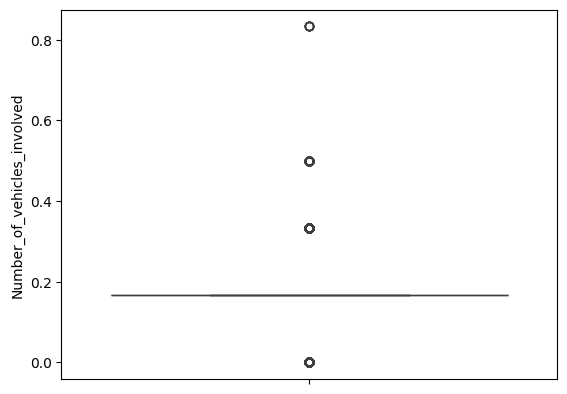

In [28]:
sns.boxplot(df['Number_of_vehicles_involved'])

<Axes: ylabel='Number_of_casualties'>

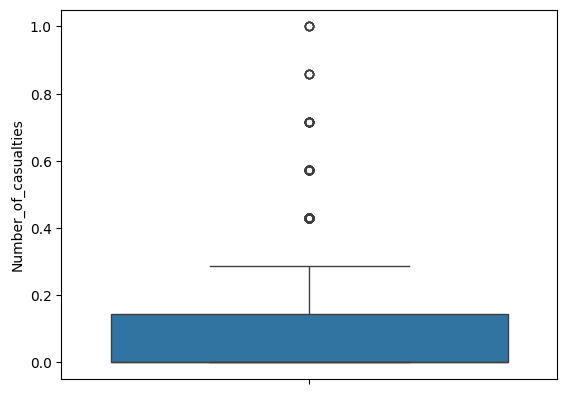

In [29]:
sns.boxplot(df['Number_of_casualties'])

In [30]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

remove_outliers(df,'Number_of_casualties')

,Time,Day_of_week,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Road_allignment,Number_of_vehicles_involved,Number_of_casualties,...,Road_surface_conditions_Wet or damp,Light_conditions_Darkness - lights lit,Light_conditions_Darkness - lights unlit,Light_conditions_Darkness - no lighting,Light_conditions_Daylight,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Educational_level_E
9,17:20:00,Friday,Junior high school,1.5,Automobile,Owner,Residential areas,Tangent road with flat terrain,0.166667,0.000000,...,False,False,False,False,True,True,False,False,False,4
14,17:45:00,Thursday,Junior high school,11.0,Automobile,Owner,Office areas,Escarpments,0.166667,0.142857,...,False,False,False,False,True,False,True,False,False,4
19,8:20:00,Tuesday,Junior high school,1.0,Long lorry,Owner,Residential areas,Tangent road with flat terrain,0.166667,0.000000,...,False,False,False,False,True,True,False,False,False,4
21,15:10:00,Thursday,Junior high school,3.0,Lorry (11?40Q),Owner,Church areas,Tangent road with flat terrain,0.000000,0.000000,...,False,False,False,False,True,True,False,False,False,4
23,12:11:00,Thursday,Junior high school,11.0,Public (12 seats),Owner,Industrial areas,Tangent road with flat terrain,0.166667,0.000000,...,False,False,False,False,True,False,True,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12253,20:15:00,Monday,Junior high school,7.0,Motorcycle,Owner,Office areas,Tangent road with mild grade and flat terrain,0.333333,0.000000,...,False,False,False,False,True,True,False,False,False,4
12258,20:17:00,Thursday,Junior high school,1.5,Automobile,Owner,Church areas,Tangent road with flat terrain,0.000000,0.142857,...,False,False,False,False,True,False,True,False,False,4
12262,16:30:00,Tuesday,Junior high school,11.0,Lorry (41?100Q),Owner,Industrial areas,Tangent road with mild grade and flat terrain,0.000000,0.000000,...,False,True,False,False,False,False,True,False,False,4
12273,12:10:00,Friday,Junior high school,11.0,Automobile,Owner,Office areas,Tangent road with flat terrain,0.000000,0.000000,...,False,False,False,False,True,True,False,False,False,4


## **Feature Engineering**

In [31]:
# I created a new function to define whether the Accident happened in a peak time or not
def is_peak_time(row):
    morning = range(7, 11)
    night = range(16, 22)
    Days = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday']
    time_hour = int(row['Time'].split(':')[0])
    day = row['Day_of_week']

    return day in Days and (time_hour in morning or time_hour in night)


df['IS_Peak_Time'] = df.apply(is_peak_time, axis=1)
df.sample()

,Time,Day_of_week,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Road_allignment,Number_of_vehicles_involved,Number_of_casualties,...,Light_conditions_Darkness - lights lit,Light_conditions_Darkness - lights unlit,Light_conditions_Darkness - no lighting,Light_conditions_Daylight,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Educational_level_E,IS_Peak_Time
1009,14:51:00,Sunday,High school,11.0,Automobile,Organization,Office areas,Gentle horizontal curve,0.166667,0.142857,...,False,False,False,True,False,True,False,False,2,False


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

# **Ber chart**

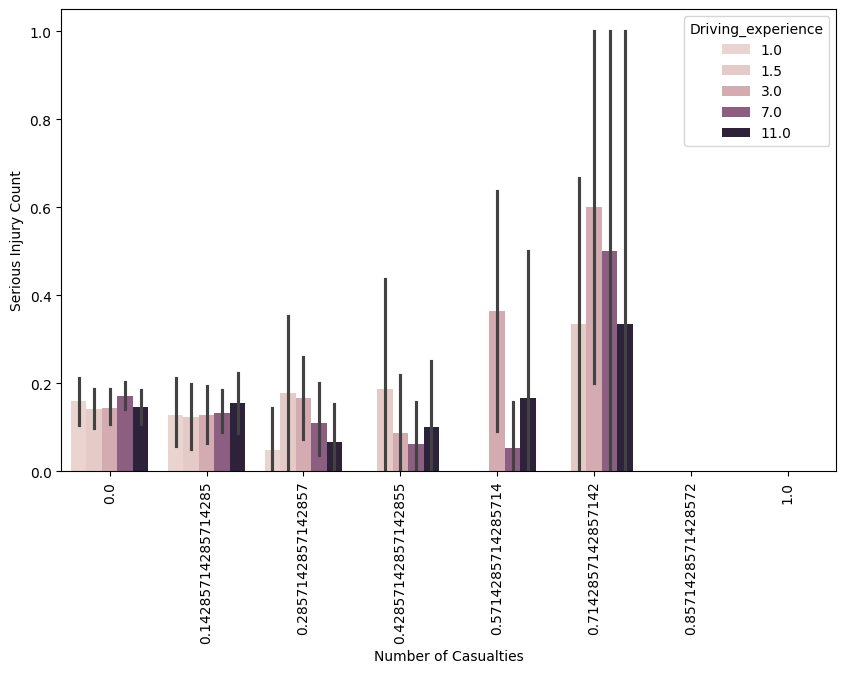

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Number_of_casualties', y='Accident_severity_Serious Injury', hue='Driving_experience', data=df)

plt.xlabel('Number of Casualties')
plt.ylabel('Serious Injury Count')
plt.xticks(rotation=90)
plt.show()

# **Heatmap chart**

<Axes: >

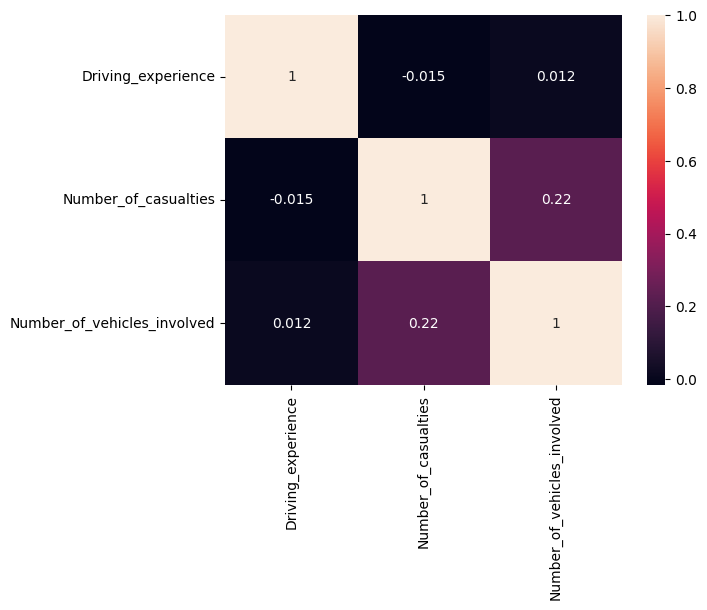

In [33]:
n = df[['Driving_experience','Number_of_casualties','Number_of_vehicles_involved']].apply(pd.to_numeric,errors = 'coerce')
corr = n.corr()
sns.heatmap(corr, annot=True)

# **Ber chart**

<Axes: ylabel='Day_of_week'>

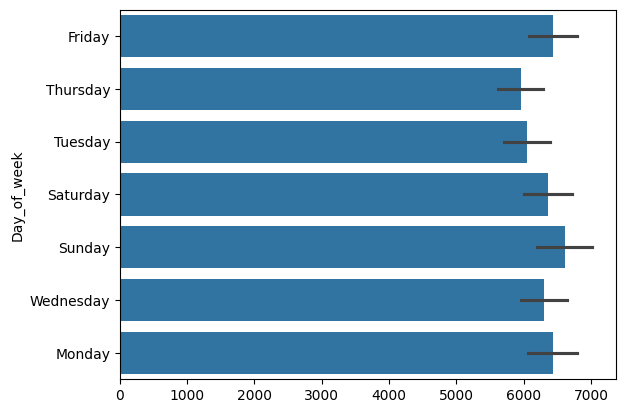

In [34]:
sns.barplot(df['Day_of_week'])

# **Histogram**

(array([689.,   0., 565.,   0.,   0.,   0., 901.,   0.,   0., 495.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

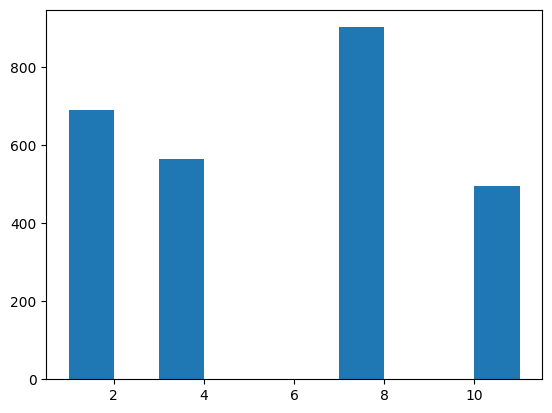

In [35]:
plt.hist(df['Driving_experience'])

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [36]:
X = df[['IS_Peak_Time','Driving_experience','Number_of_casualties','Number_of_vehicles_involved',
        'Vehicle_movement_Entering a junction', 'Vehicle_movement_Getting off',
       'Vehicle_movement_Going straight', 'Vehicle_movement_Moving Backward',
       'Vehicle_movement_Overtaking', 'Vehicle_movement_Reversing',
       'Vehicle_movement_Stopping', 'Vehicle_movement_Turnover',
       'Vehicle_movement_U-Turn', 'Vehicle_movement_Waiting to go','Type_of_collision_Collision with animals',
       'Type_of_collision_Collision with pedestrians',
       'Type_of_collision_Collision with roadside objects',
       'Type_of_collision_Collision with roadside-parked vehicles',
       'Type_of_collision_Fall from vehicles', 'Type_of_collision_Rollover',
       'Type_of_collision_Vehicle with vehicle collision',
       'Type_of_collision_With Train', 'Weather_conditions_Cloudy',
       'Weather_conditions_Fog or mist', 'Weather_conditions_Normal',
       'Weather_conditions_Raining', 'Weather_conditions_Raining and Windy',
       'Weather_conditions_Snow', 'Weather_conditions_Windy','Road_surface_type_Asphalt roads',
       'Road_surface_type_Asphalt roads with some distress',
       'Road_surface_type_Earth roads', 'Road_surface_type_Gravel roads',
       'Road_surface_conditions_Dry', 'Road_surface_conditions_Snow',
       'Road_surface_conditions_Wet or damp',
       'Light_conditions_Darkness - lights lit',
       'Light_conditions_Darkness - lights unlit',
       'Light_conditions_Darkness - no lighting', 'Light_conditions_Daylight',
       'Age_band_of_driver_18-30', 'Age_band_of_driver_31-50',
       'Age_band_of_driver_Over 51', 'Age_band_of_driver_Under 18']]

df['Accident_severity'] = df[['Accident_severity_Fatal injury',
                              'Accident_severity_Serious Injury',
                              'Accident_severity_Slight Injury']].idxmax(axis=1)

df['Accident_severity_class'] = df['Accident_severity'].map({
    'Accident_severity_Fatal injury': 0,
    'Accident_severity_Serious Injury': 1,
    'Accident_severity_Slight Injury': 2
})

y = df['Accident_severity_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [37]:
log_reg2 = LogisticRegression(solver="lbfgs")
log_reg2.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Decision Tree Classifier

In [38]:
tree_clf = DecisionTreeClassifier(max_depth=6)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=6)

#### Support Vector Machine (SVM)

In [39]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

#### K-Neighbors Classifier

In [40]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

# **Logistic Regression Evaluation**

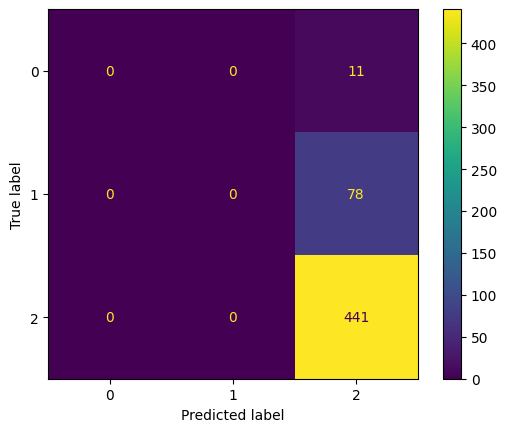

In [41]:
predicted = log_reg2.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2])
cm_display.plot()
plt.show()

In [42]:
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted, average='weighted')
recall = metrics.recall_score(y_test, predicted, average='weighted')
f1 = metrics.f1_score(y_test, predicted, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8321
Precision: 0.6923
Recall: 0.8321
F1 Score: 0.7558


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Decision Tree Evaluation**

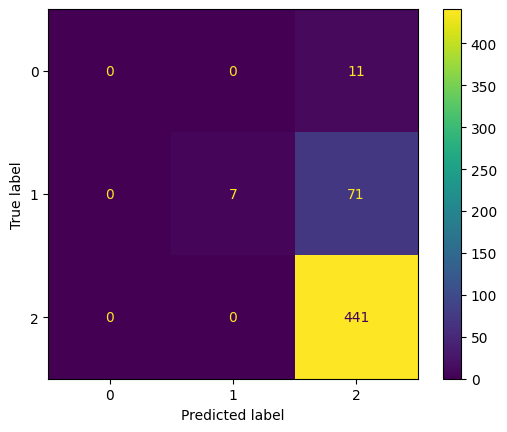

In [43]:
predicted = tree_clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2])
cm_display.plot()
plt.show()

In [44]:
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted, average='weighted')
recall = metrics.recall_score(y_test, predicted, average='weighted')
f1 = metrics.f1_score(y_test, predicted, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8453
Precision: 0.8488
Recall: 0.8453
F1 Score: 0.7855


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **SVM Evaluation**

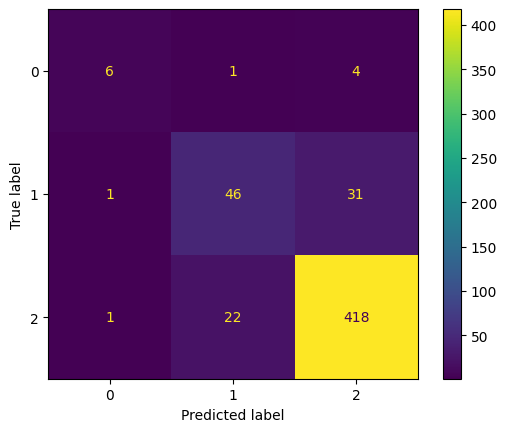

In [45]:
predicted = polynomial_svm_clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2])
cm_display.plot()
plt.show()

In [46]:
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted, average='weighted')
recall = metrics.recall_score(y_test, predicted, average='weighted')
f1 = metrics.f1_score(y_test, predicted, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8868
Precision: 0.8815
Recall: 0.8868
F1 Score: 0.8833


# **KNN Evaluation**

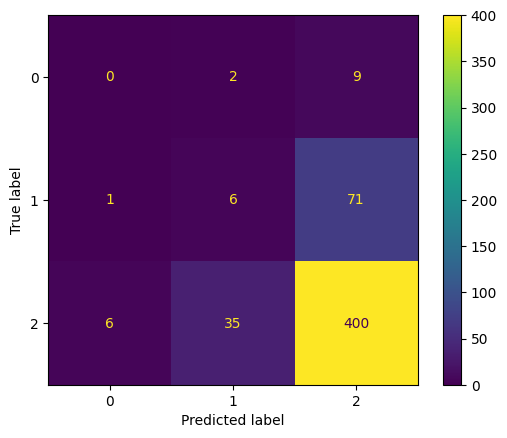

In [47]:
predicted = knn_clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2])
cm_display.plot()
plt.show()

In [48]:
accuracy = metrics.accuracy_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted, average='weighted')
recall = metrics.recall_score(y_test, predicted, average='weighted')
f1 = metrics.f1_score(y_test, predicted, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7660
Precision: 0.7139
Recall: 0.7660
F1 Score: 0.7374


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1- since we are dealing with classification problem we have to take into account and focus on f score, SVM acchived the highest f1 score (88.3%) and 88.6% accuracy. The next Decision Tree comes, it achivied 78.5% f1 score and 84.5% accuracy.




2- Support Vector Machine (SVM) model was the one who took more time in training compared to the other models. I general they all were easy to implement but for the SVM it was a little hard because I was dealing with non linear relationship.


3- I will choose SVM because it gives the highest accuracy, deals well with non linear data and fits well to the data.


4- the variable 'X' in the split data function contains all the features that are necessary and have to be taken into account when training a model with this type of objective.



5- I think thick knn and logistic regression are too simple for this objective of training, and the data are non linear or more complex so need to be used a little complex model.


6- we might use data augmenation because the size of the data has decreased, or we can use a pre-trained model and fine tune it. In general it depends on the context